# Data wrangling.
we start with imort the packages we will use for analysis, wrangling, visualization and machine learning


In [1]:
#data wrangling
%pylab inline
import pandas as pd
import numpy as np
import IPython as ip
import scipy as sp
#ml
import sklearn
#visuals
import matplotlib

#regular expressions
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Getting exposed to our data.
we read in the data(test and train), from their csv paths, and do some exposure for analysis and cleaning.

In [3]:
train = pd.read_csv("C:\\Users\\Prof. Onyi Udumukwu\\Documents\\python\\Project\\train.csv")
test = pd.read_csv("C:\\Users\\Prof. Onyi Udumukwu\\Documents\\python\\Project\\test.csv")

In [4]:
print("these are the columns with null values \n", train.isnull().sum())
print("-" *50)
print("these are the columns with null values \n", test.isnull().sum())

these are the columns with null values 
 S/N           0
Gender        0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
Score         0
dtype: int64
--------------------------------------------------
these are the columns with null values 
 S/N           0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
dtype: int64


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
S/N           325 non-null int64
Gender        325 non-null object
Age           325 non-null int64
Location      325 non-null object
famsize       325 non-null object
Pstatus       325 non-null object
Medu          325 non-null int64
Fedu          325 non-null int64
traveltime    325 non-null int64
studytime     325 non-null int64
failures      325 non-null int64
schoolsup     325 non-null object
famsup        325 non-null object
paid          325 non-null object
activities    325 non-null object
nursery       325 non-null object
higher        325 non-null object
internet      325 non-null object
famrel        325 non-null int64
freetime      325 non-null int64
health        325 non-null int64
absences      325 non-null int64
Score         325 non-null int64
dtypes: int64(12), object(11)
memory usage: 58.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
S/N           323 non-null int64
Age           323 non-null int64
Location      323 non-null object
famsize       323 non-null object
Pstatus       323 non-null object
Medu          323 non-null int64
Fedu          323 non-null int64
traveltime    323 non-null int64
studytime     323 non-null int64
failures      323 non-null int64
schoolsup     323 non-null object
famsup        323 non-null object
paid          323 non-null object
activities    323 non-null object
nursery       323 non-null object
higher        323 non-null object
internet      323 non-null object
famrel        323 non-null int64
freetime      323 non-null int64
health        323 non-null int64
absences      323 non-null int64
dtypes: int64(11), object(10)
memory usage: 53.1+ KB


In [7]:
train = train[['Score', 'Gender','studytime','Age','health','absences', 'S/N','Location','famsize','Pstatus','Medu','Fedu',
               'traveltime','failures','schoolsup','famsup','famrel','internet','nursery','activities','freetime','higher','paid']]




test = test[['studytime','Age','health','absences', 'S/N','Location','famsize','Pstatus','Medu','Fedu',
               'traveltime','failures','schoolsup','famsup','famrel','internet','nursery','activities','freetime','higher','paid']]

In [8]:
test.describe()

,studytime,Age,health,absences,S/N,Medu,Fedu,traveltime,failures,famrel,freetime
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.907121,12.170279,3.476780,2.916409,488.000000,2.312693,2.139319,1.687307,0.260062,3.934985,3.176471
std,0.840019,1.163143,1.453819,3.750256,93.386294,1.146718,1.081652,0.754732,0.605756,0.999433,1.110287
min,1.000000,10.000000,1.000000,0.000000,327.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,11.000000,2.000000,0.000000,407.500000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000
50%,2.000000,12.000000,4.000000,2.000000,488.000000,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000
75%,2.000000,13.000000,5.000000,4.000000,568.500000,3.000000,3.000000,2.000000,0.000000,5.000000,4.000000
max,4.000000,16.000000,5.000000,21.000000,649.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000


In [9]:
test.columns

Index(['studytime', 'Age', 'health', 'absences', 'S/N', 'Location', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'traveltime', 'failures', 'schoolsup',
       'famsup', 'famrel', 'internet', 'nursery', 'activities', 'freetime',
       'higher', 'paid'],
      dtype='object')

In [10]:
drop_column = ['S/N']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)


# Getting the co-relation between features.

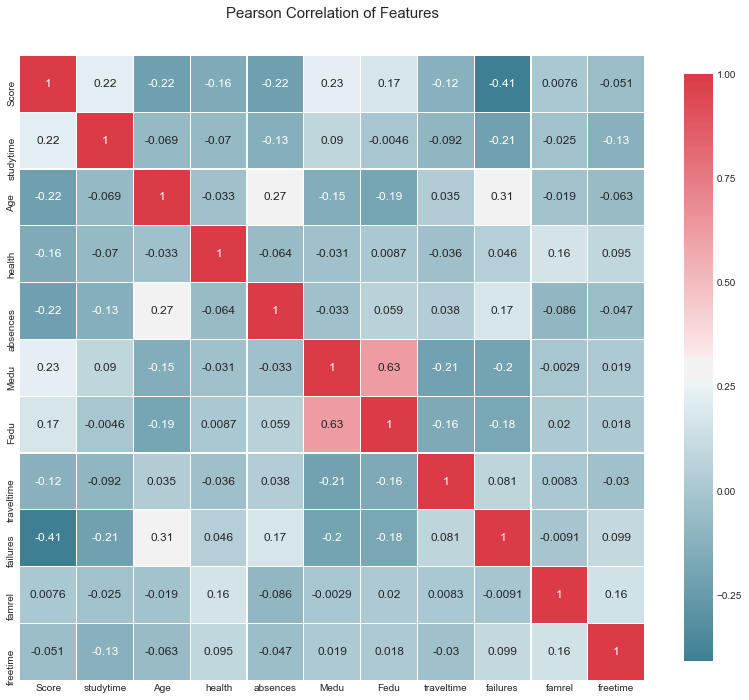

In [11]:
train.head()
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

(array([  86.,  112.,   77.,    0.,   41.,    7.,    0.,    1.,    0.,    1.]),
 array([ 10. ,  10.7,  11.4,  12.1,  12.8,  13.5,  14.2,  14.9,  15.6,
         16.3,  17. ]),
 <a list of 10 Patch objects>)

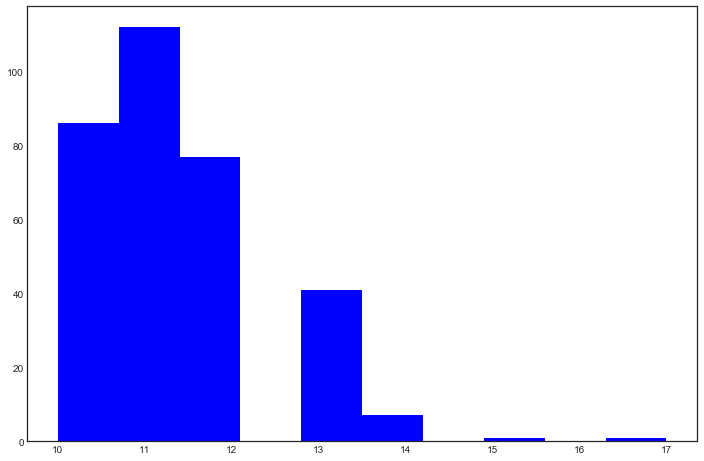

In [12]:
plt.hist(train.Age,color='blue')

In [13]:
train.Age.size

325

In [14]:
train.Score.size

325

(array([ 14.,  11.,  30.,  68.,  56.,  61.,  41.,  21.,  15.,   8.]),
 array([ 20. ,  23.3,  26.6,  29.9,  33.2,  36.5,  39.8,  43.1,  46.4,
         49.7,  53. ]),
 <a list of 10 Patch objects>)

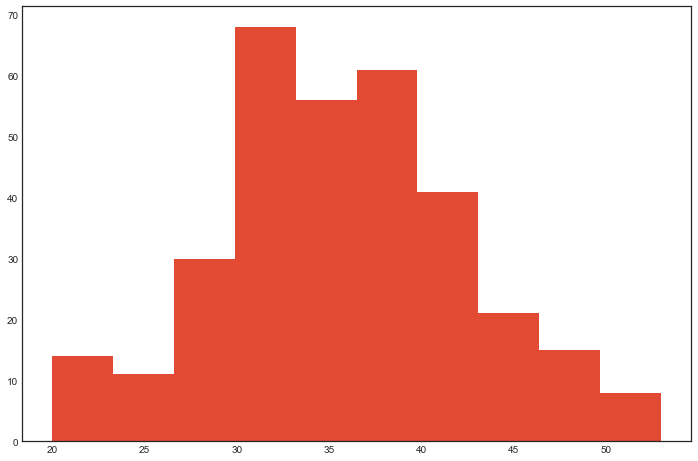

In [15]:
plt.hist(train.Score)

In [16]:
train.describe(include='all')

,Score,Gender,studytime,Age,health,absences,Location,famsize,Pstatus,Medu,...,failures,schoolsup,famsup,famrel,internet,nursery,activities,freetime,higher,paid
count,325.000000,325,325.000000,325.000000,325.000000,325.000000,325,325,325,325.000000,...,325.000000,325,325,325.000000,325,325,325,325.000000,325,325
unique,NaN,2,NaN,NaN,NaN,NaN,2,2,2,NaN,...,NaN,2,2,NaN,2,2,2,NaN,2,2
top,NaN,F,NaN,NaN,NaN,NaN,U,GT3,T,NaN,...,NaN,no,yes,NaN,yes,yes,yes,NaN,yes,no
freq,NaN,171,NaN,NaN,NaN,NaN,265,234,285,NaN,...,NaN,273,206,NaN,268,255,171,NaN,297,304
mean,35.713846,NaN,1.956923,11.320000,3.590769,4.341538,NaN,NaN,NaN,2.710769,...,0.184615,NaN,NaN,3.926154,NaN,NaN,NaN,3.178462,NaN,NaN
std,6.732175,NaN,0.819133,1.123157,1.438634,5.200038,NaN,NaN,NaN,1.086977,...,0.579812,NaN,NaN,0.913256,NaN,NaN,NaN,0.987029,NaN,NaN
min,20.000000,NaN,1.000000,10.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,31.000000,NaN,1.000000,10.000000,3.000000,0.000000,NaN,NaN,NaN,2.000000,...,0.000000,NaN,NaN,3.000000,NaN,NaN,NaN,3.000000,NaN,NaN
50%,36.000000,NaN,2.000000,11.000000,4.000000,2.000000,NaN,NaN,NaN,3.000000,...,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN,3.000000,NaN,NaN
75%,40.000000,NaN,2.000000,12.000000,5.000000,6.000000,NaN,NaN,NaN,4.000000,...,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN,NaN


In [17]:
train.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'absences', 'Location',
       'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'famrel', 'internet', 'nursery', 'activities',
       'freetime', 'higher', 'paid'],
      dtype='object')

# Cleaning and Conversion
After doing some exposure and correlation, i decided to clean and convert some object data types to integars for futher analysis

In [18]:
le = LabelEncoder()

    

In [19]:
le.fit(train.schoolsup)
le.fit(test.schoolsup)

LabelEncoder()

In [20]:
le.classes_

array(['no', 'yes'], dtype=object)

In [21]:
train['schoolsup'] = le.transform(train.schoolsup)
test['schoolsup'] = le.transform(test.schoolsup)



In [22]:
le.fit(train.famsup)
le.fit(test.famsup)


LabelEncoder()

In [23]:
le.classes_

array(['no', 'yes'], dtype=object)

In [24]:
train['famsup'] = le.transform(train.famsup)
test['famsup'] = le.transform(test.famsup)

In [25]:
le.fit(train.paid)
le.fit(test.paid)

LabelEncoder()

In [26]:
train['paid'] = le.transform(train.paid)
test['paid'] = le.transform(test.paid)

In [27]:
le.fit(train.activities)
le.fit(test.activities)

LabelEncoder()

In [28]:
train['activities'] = le.transform(train.activities)
test['activities'] = le.transform(test.activities)

In [29]:
le.fit(train.internet)
le.fit(test.internet)

LabelEncoder()

In [30]:
train['internet'] = le.transform(train.internet)
test['internet'] = le.transform(test.internet)

In [31]:
train['engage'] = train['famsup'] + train['schoolsup'] + train['internet'] + train['paid'] +train['activities']
test['engage'] = test['famsup'] + test['schoolsup'] + test['internet'] + test['paid'] +test['activities']

In [32]:
drop_column = ['famsup','schoolsup', 'internet']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [33]:
test.head()

,studytime,Age,health,absences,Location,famsize,Pstatus,Medu,Fedu,traveltime,failures,famrel,nursery,activities,freetime,higher,paid,engage
0,1,12,3,18,U,LE3,A,3,2,1,0,4,yes,0,4,yes,0,1
1,4,13,3,2,R,LE3,T,1,1,2,0,5,yes,1,2,yes,0,2
2,2,13,4,0,U,GT3,T,1,1,2,0,5,yes,1,4,yes,0,3
3,2,12,5,12,U,GT3,T,2,2,1,0,5,no,0,4,yes,0,2
4,2,13,5,10,U,GT3,T,2,1,2,0,4,yes,1,3,yes,0,2


In [34]:
drop_column = ['Location','famsize', 'Pstatus']
train = train.drop(drop_column, axis=1)
test = test.drop(drop_column, axis=1)

In [35]:
train.head(10)

,Score,Gender,studytime,Age,health,absences,Medu,Fedu,traveltime,failures,famrel,nursery,activities,freetime,higher,paid,engage
0,22,F,2,13,3,4,4,4,2,0,4,yes,0,3,yes,0,1
1,31,F,2,12,3,2,1,1,1,0,5,no,0,3,yes,0,2
2,37,F,2,10,3,6,1,1,1,0,4,yes,0,3,yes,0,2
3,42,F,3,10,5,0,4,2,1,0,3,yes,1,2,yes,0,3
4,37,F,2,11,5,0,3,3,1,0,4,yes,0,3,yes,0,1
5,37,M,2,11,5,6,4,3,1,0,5,yes,1,4,yes,0,3
6,38,M,2,11,3,0,2,2,1,0,4,yes,0,4,yes,0,1
7,36,F,2,12,1,2,4,4,2,0,4,yes,0,1,yes,0,2
8,48,M,2,10,1,0,3,2,1,0,4,yes,0,2,yes,0,2
9,37,M,2,10,5,0,3,4,1,0,5,yes,1,5,yes,0,3


In [36]:
train = train.drop(['failures'], axis=1)
test = test.drop(['failures'], axis=1)

In [37]:
train = train.drop(['traveltime'],  axis=1)
test = test.drop(['traveltime'],  axis=1)

In [38]:
train = train.drop([ 'paid', 'absences'], axis=1)
test = test.drop([ 'paid', 'absences'], axis=1)

In [39]:
train_male = train[train['Gender'] == 'M']
train_female = train[train['Gender'] == 'F']

In [40]:
train_male_mature =train_male['Age'] >= 13
train_male_young = train_male['Age'] <= 12

In [41]:
train_male['mature'] = train_male_mature
train_male['young'] = train_male_young

c:\users\prof. onyi udumukwu\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\prof. onyi udumukwu\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
test.info()
print('.'  *100)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
studytime     323 non-null int64
Age           323 non-null int64
health        323 non-null int64
Medu          323 non-null int64
Fedu          323 non-null int64
famrel        323 non-null int64
nursery       323 non-null object
activities    323 non-null int64
freetime      323 non-null int64
higher        323 non-null object
engage        323 non-null int64
dtypes: int64(9), object(2)
memory usage: 27.8+ KB
....................................................................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
Score         325 non-null int64
Gender        325 non-null object
studytime     325 non-null int64
Age           325 non-null int64
health        325 non-null int64
Medu          325 non-null int64
Fedu          325 non-null int64
famrel        325 non-null int64
nursery 

In [43]:
train_female_young = train_female['Age'] <= 12
train_female_mature = train_female['Age'] >=13

In [44]:

train_female['young'] = train_female_young
train_female['mature'] = train_female_mature

c:\users\prof. onyi udumukwu\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\prof. onyi udumukwu\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
train_male.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'nursery', 'activities', 'freetime', 'higher', 'engage',
       'mature', 'young'],
      dtype='object')

In [46]:
train_female.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'nursery', 'activities', 'freetime', 'higher', 'engage',
       'young', 'mature'],
      dtype='object')

In [47]:
train_male = train_male.drop([ 'Gender', 'higher', 'nursery'], axis=1)

In [48]:
train_female = train_female.drop([ 'Gender', 'higher', 'nursery'], axis=1)

In [49]:
train_female = train_female.drop([ 'Fedu', 'famrel'], axis=1)

In [50]:
train_male = train_male.drop([ 'Fedu', 'famrel'], axis=1)

In [51]:
train_male.columns

Index(['Score', 'studytime', 'Age', 'health', 'Medu', 'activities', 'freetime',
       'engage', 'mature', 'young'],
      dtype='object')

In [52]:
train_male.head(5)

,Score,studytime,Age,health,Medu,activities,freetime,engage,mature,young
5,37,2,11,5,4,1,4,3,False,True
6,38,2,11,3,2,0,4,1,False,True
8,48,2,10,1,3,0,2,2,False,True
9,37,2,10,5,3,1,5,3,False,True
12,37,1,10,5,4,1,3,3,False,True


In [53]:
le.fit(train_male.mature)

LabelEncoder()

In [54]:
train_male['mature'] = le.transform(train_male.mature)

In [55]:
le.fit(train_male.young)

LabelEncoder()

In [56]:
train_male['young'] = le.transform(train_male.young)

In [57]:
le.fit(train_female_young)

train_female['young'] = le.transform(train_female.young)

In [58]:
le.fit(train_female_mature)

train_female['mature'] = le.transform(train_female.mature)

In [59]:
train_female.head(5)

,Score,studytime,Age,health,Medu,activities,freetime,engage,young,mature
0,22,2,13,3,4,0,3,1,0,1
1,31,2,12,3,1,0,3,2,1,0
2,37,2,10,3,1,0,3,2,1,0
3,42,3,10,5,4,1,2,3,1,0
4,37,2,11,5,3,0,3,1,1,0


In [60]:
train_male.head(5)

,Score,studytime,Age,health,Medu,activities,freetime,engage,mature,young
5,37,2,11,5,4,1,4,3,0,1
6,38,2,11,3,2,0,4,1,0,1
8,48,2,10,1,3,0,2,2,0,1
9,37,2,10,5,3,1,5,3,0,1
12,37,1,10,5,4,1,3,3,0,1


In [61]:
train_male = train_male.drop([ 'activities'], axis=1)

train_female = train_female.drop([ 'activities'], axis=1)


In [62]:
train = train.drop([ 'activities', 'nursery', 'higher'], axis=1)


In [63]:
train.head()

,Score,Gender,studytime,Age,health,Medu,Fedu,famrel,freetime,engage
0,22,F,2,13,3,4,4,4,3,1
1,31,F,2,12,3,1,1,5,3,2
2,37,F,2,10,3,1,1,4,3,2
3,42,F,3,10,5,4,2,3,2,3
4,37,F,2,11,5,3,3,4,3,1


# General visualization of data
1. first graph shows the relationship/performance between the male Gender who are of Age vs their Age
2. second shows the relationship.performance between same Gender who are younger and ofcourse vs their age

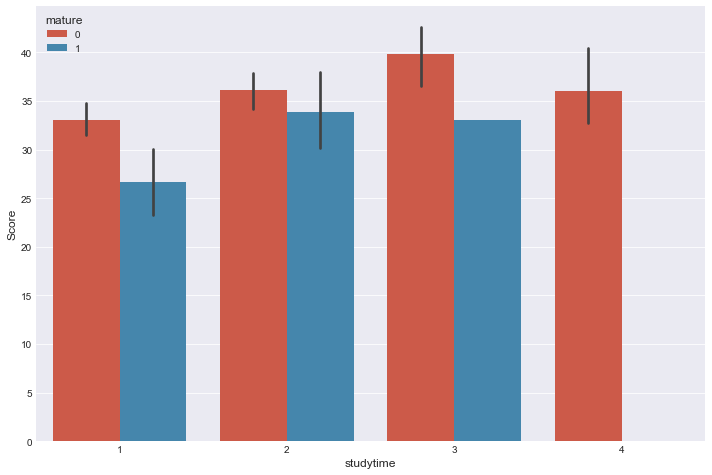

In [64]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='studytime', hue='mature')
        

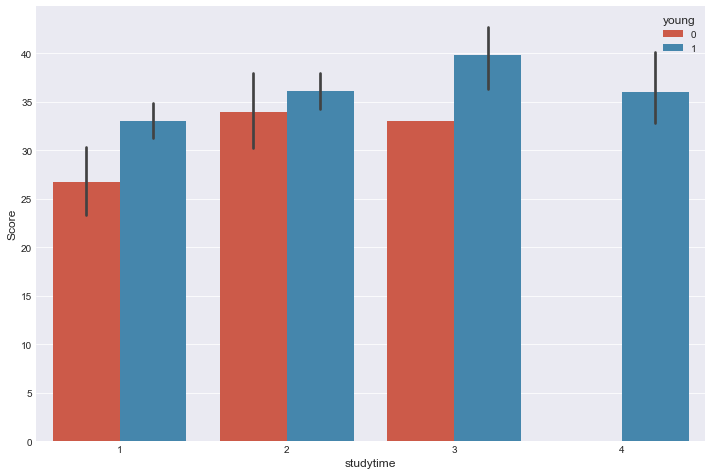

In [65]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='studytime', hue='young')
        

# This graph shows the relationship between the Scores of the male child judging from their freetime

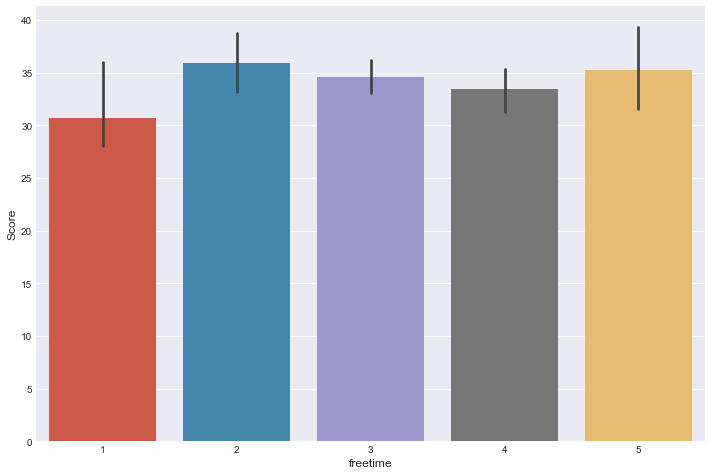

In [66]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='freetime')
        

# This shows the relationship between a mature male's Score and his freetime

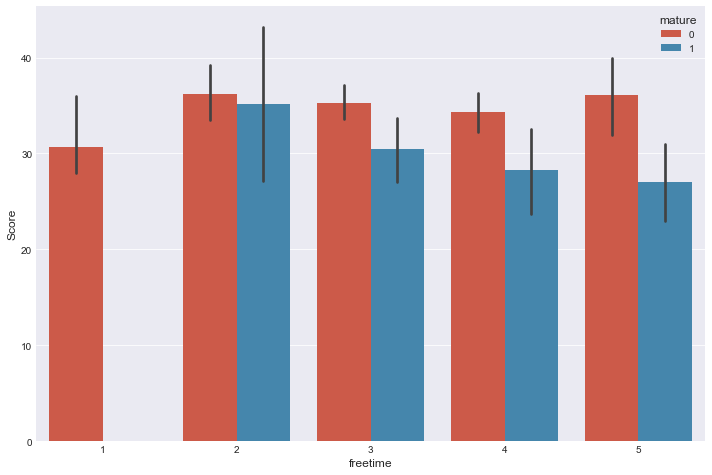

In [67]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='freetime', hue='mature')
        

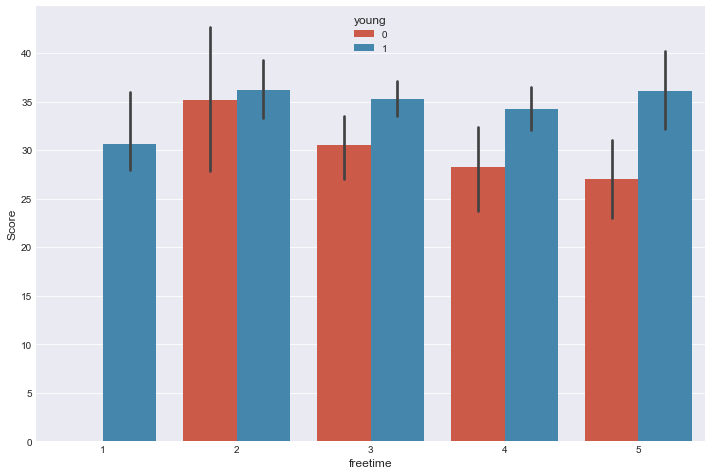

In [68]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='freetime', hue='young')
        

# We all know health is wealth. This shows a simple comparism between the performance of a student ,from his freetime, and his health

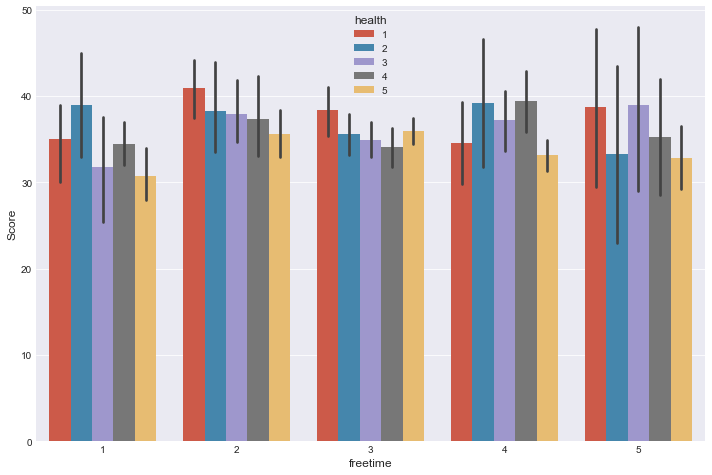

In [69]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train, y = 'Score', x='freetime', hue='health')
        

In [70]:
internet = pd.read_csv("C:\\Users\\Prof. Onyi Udumukwu\\Documents\\python\\Project\\train.csv")

In [71]:
train['internet'] = internet['internet']

In [72]:
train_male['internet'] = train['internet']
train_female['internet'] = train['internet']

In [73]:
train_male.info()
print("........................................")
train_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 5 to 324
Data columns (total 10 columns):
Score        154 non-null int64
studytime    154 non-null int64
Age          154 non-null int64
health       154 non-null int64
Medu         154 non-null int64
freetime     154 non-null int64
engage       154 non-null int64
mature       154 non-null int64
young        154 non-null int64
internet     154 non-null object
dtypes: int64(9), object(1)
memory usage: 18.2+ KB
........................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 322
Data columns (total 10 columns):
Score        171 non-null int64
studytime    171 non-null int64
Age          171 non-null int64
health       171 non-null int64
Medu         171 non-null int64
freetime     171 non-null int64
engage       171 non-null int64
young        171 non-null int64
mature       171 non-null int64
internet     171 non-null object
dtypes: int64(9), object(1)
memory usage: 14.7+ KB


# This next graph shows the analysis between young and mature children of both Gender, and their performances having access to the internet.

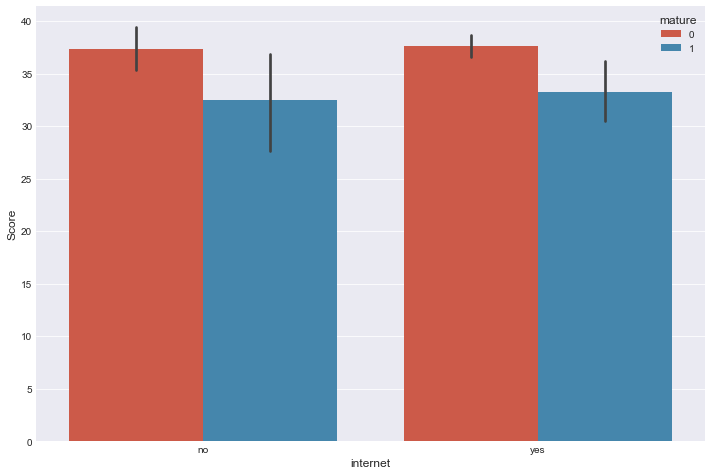

In [74]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_female, y = 'Score', x='internet', hue='mature')
        

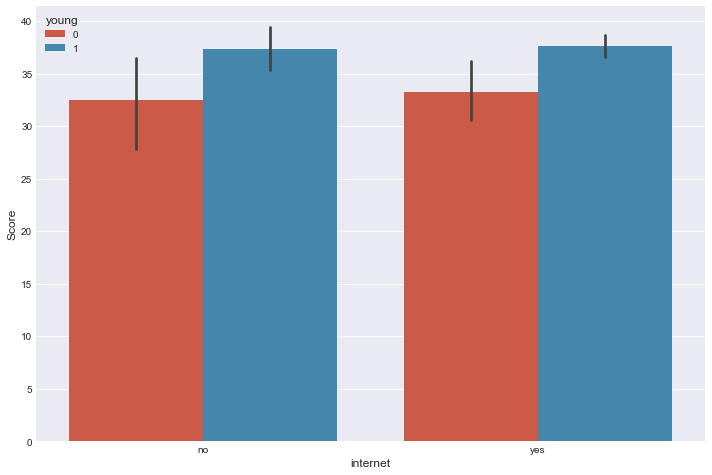

In [75]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_female, y = 'Score', x='internet', hue='young')
        

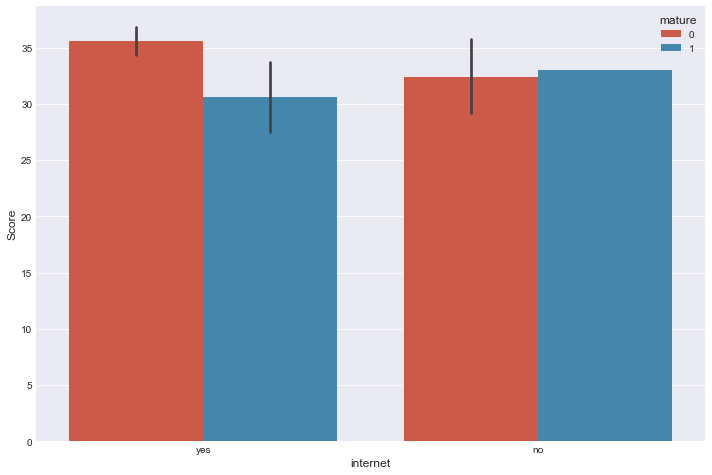

In [76]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='internet', hue='mature')
        

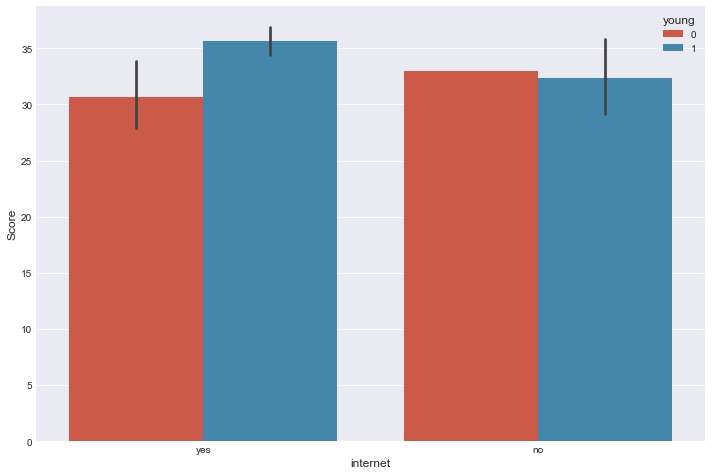

In [77]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='internet', hue='young')
        

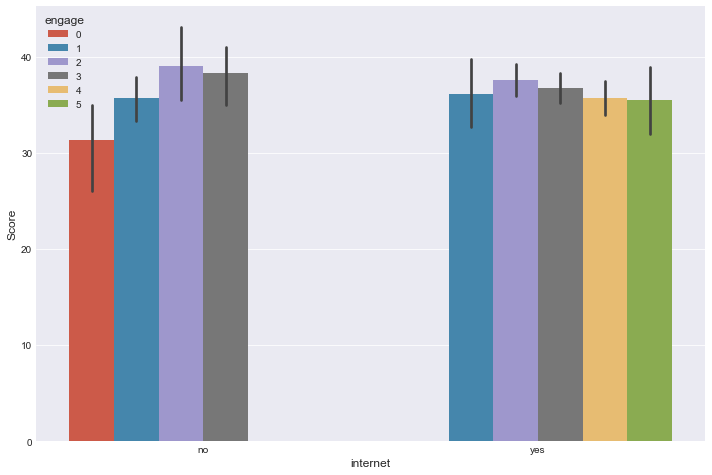

In [78]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_female, y = 'Score', x='internet', hue='engage')
        

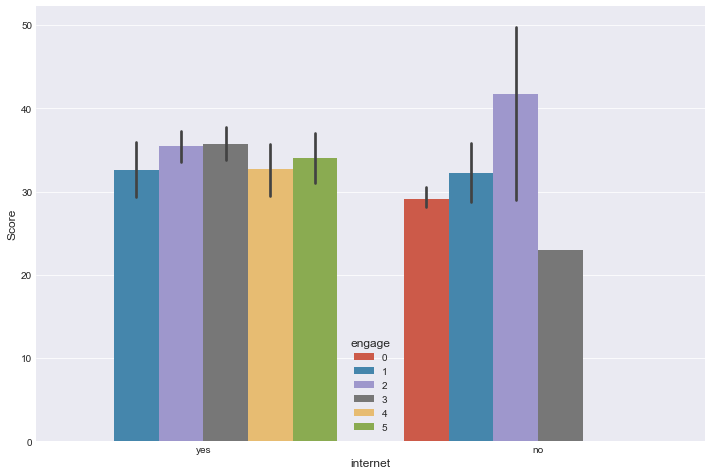

In [79]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='internet', hue='engage')
        

In [80]:
train.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'freetime', 'engage', 'internet'],
      dtype='object')

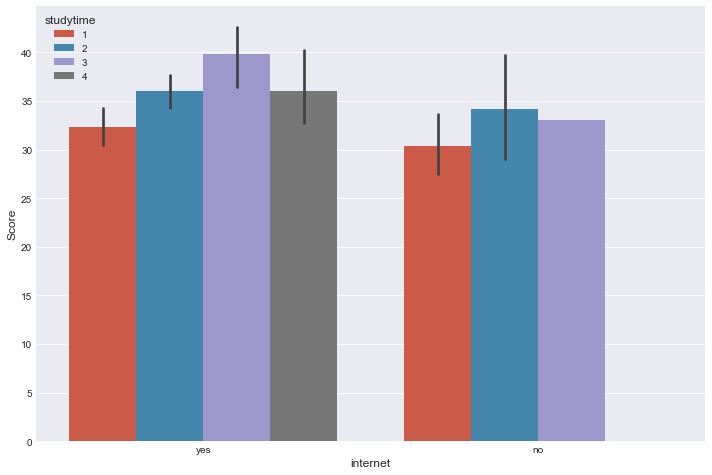

In [81]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='internet', hue='studytime')
        

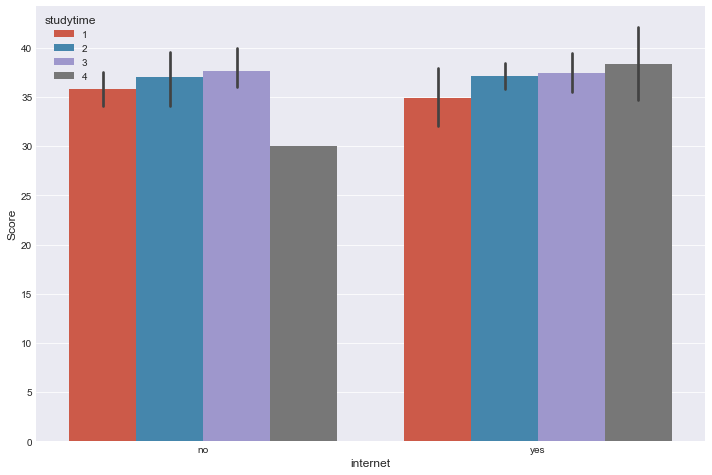

In [82]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_female, y = 'Score', x='internet', hue='studytime')
        

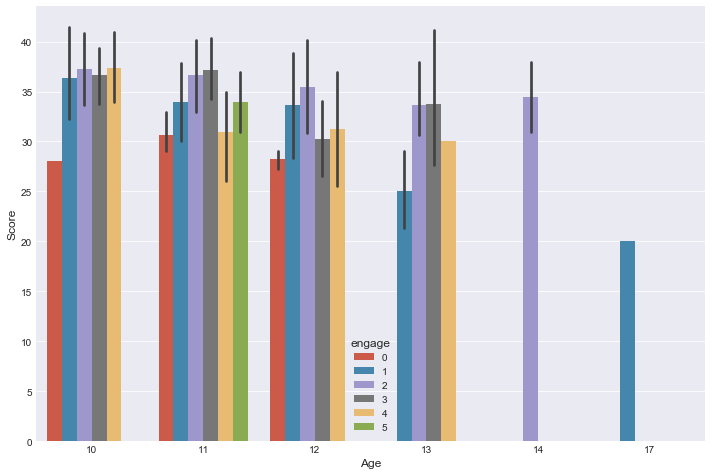

In [83]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_male, y = 'Score', x='Age', hue='engage')
        

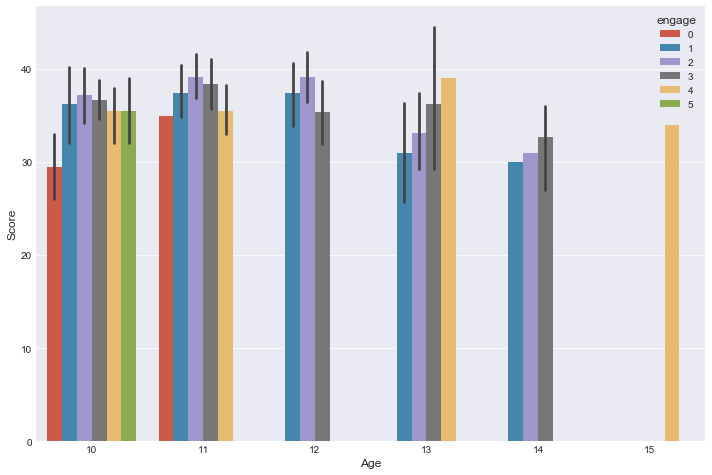

In [84]:
 #visualization of Scores and Studytime
with sns.axes_style('darkgrid'):
    sns.barplot(data=train_female, y = 'Score', x='Age', hue='engage')
        

In [85]:
train_male.columns

Index(['Score', 'studytime', 'Age', 'health', 'Medu', 'freetime', 'engage',
       'mature', 'young', 'internet'],
      dtype='object')

In [86]:
train.columns



Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'freetime', 'engage', 'internet'],
      dtype='object')

In [87]:
test.columns

Index(['studytime', 'Age', 'health', 'Medu', 'Fedu', 'famrel', 'nursery',
       'activities', 'freetime', 'higher', 'engage'],
      dtype='object')

In [88]:
train.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'freetime', 'engage', 'internet'],
      dtype='object')

In [89]:
test = test.drop([ 'activities','famrel','higher'], axis=1)

In [90]:
train.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'famrel', 'freetime', 'engage', 'internet'],
      dtype='object')

In [91]:
test.columns

Index(['studytime', 'Age', 'health', 'Medu', 'Fedu', 'nursery', 'freetime',
       'engage'],
      dtype='object')

In [92]:
train = train.drop(['famrel'], axis=1)

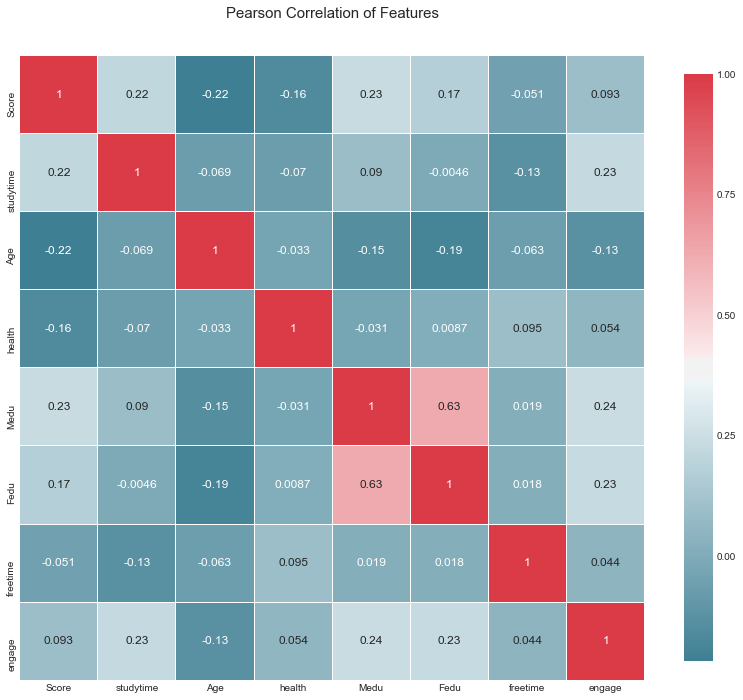

In [93]:

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [94]:
#ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



In [95]:
train.columns

Index(['Score', 'Gender', 'studytime', 'Age', 'health', 'Medu', 'Fedu',
       'freetime', 'engage', 'internet'],
      dtype='object')

In [96]:
columns = ['studytime', 'Medu', 'Fedu', 'engage']

In [97]:
X = train[columns]
Y = train['Score']
#lg.fit(X, Y)

In [98]:
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [99]:
lg = LinearRegression()

In [100]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
train_Y.count()

227

In [102]:
train_X.count()

studytime    227
Medu         227
Fedu         227
engage       227
dtype: int64

In [103]:
pred =lg.predict(test_X)

# print(pred.round())
# z = mean_squared_error(test_Y, pred)


In [104]:
print(pred.round())

[ 35.  32.  36.  34.  35.  38.  32.  41.  38.  36.  32.  36.  34.  31.  40.
  36.  37.  36.  35.  37.  35.  34.  34.  38.  40.  37.  33.  42.  35.  40.
  34.  33.  37.  30.  34.  41.  37.  35.  34.  33.  38.  38.  36.  36.  37.
  32.  38.  36.  36.  37.  36.  34.  36.  35.  34.  35.  36.  39.  38.  33.
  39.  40.  35.  38.  38.  35.  36.  34.  38.  32.  36.  40.  31.  31.  35.
  35.  33.  34.  33.  36.  42.  33.  36.  39.  33.  31.  37.  37.  33.  33.
  36.  33.  36.  33.  39.  31.  36.  35.]


In [105]:
z=mean_squared_error(test_Y,pred)

In [106]:
z

34.788684570132204

In [107]:
serial = pd.read_csv("C:\\Users\\Prof. Onyi Udumukwu\\Documents\\python\\Project\\train.csv")

In [108]:
train['S/N'] = serial['S/N']

In [109]:
train.head()

,Score,Gender,studytime,Age,health,Medu,Fedu,freetime,engage,internet,S/N
0,22,F,2,13,3,4,4,3,1,no,1
1,31,F,2,12,3,1,1,3,2,yes,2
2,37,F,2,10,3,1,1,3,2,yes,3
3,42,F,3,10,5,4,2,2,3,yes,4
4,37,F,2,11,5,3,3,3,1,no,5


In [110]:
test.head()

,studytime,Age,health,Medu,Fedu,nursery,freetime,engage
0,1,12,3,3,2,yes,4,1
1,4,13,3,1,1,yes,2,2
2,2,13,4,1,1,yes,4,3
3,2,12,5,2,2,no,4,2
4,2,13,5,2,1,yes,3,2


In [111]:
train = train.drop(['internet'], axis=1)

In [112]:
test = test.drop(['nursery'], axis=1)

In [113]:
train.count()

Score        325
Gender       325
studytime    325
Age          325
health       325
Medu         325
Fedu         325
freetime     325
engage       325
S/N          325
dtype: int64

In [114]:
test.count()

studytime    323
Age          323
health       323
Medu         323
Fedu         323
freetime     323
engage       323
dtype: int64

In [118]:
train = train.drop(['Gender'], axis=1)

In [119]:
train = train.drop(['S/N'], axis=1)

In [120]:
column = ['studytime', 'Age', 'health', 'Medu', 'Fedu', 'engage']

In [125]:
#set prediction data to factors that will predict, and set target to SalePrice
train_data = train[column]
test_data = test[column]
target = train.Score

#fitting model with prediction data and telling it my target
lg.fit(train_data, target)

Pred = lg.predict(test_data)

In [127]:
pred.astype(pd.DataFrame)

array([34.524489517825444, 31.641821048115865, 36.46871594271666,
       34.434003738448496, 34.61497529720239, 37.83290522693626,
       32.238868215057, 41.03642033489248, 37.742419447559314,
       36.13345448269238, 32.14838243568005, 35.79819302266809,
       34.098742278424204, 30.965164710214356, 39.759178616688764,
       35.973031163569054, 36.80043918937989, 35.973031163569054,
       34.61497529720239, 36.80043918937989, 34.524489517825444,
       33.75734740054698, 34.098742278424204, 38.083814325436535,
       39.69277929030346, 37.40715798753502, 32.580263092934224,
       41.55265335367067, 35.2819600038899, 39.69277929030346,
       33.84783317992394, 33.431757571736696, 36.64968750147057,
       30.2076942241499, 34.27971383717811, 40.70115887486819,
       37.40715798753502, 35.456798144790866, 34.27358041932517,
       32.75510123383519, 37.742419447559314, 37.92339100631321,
       35.61722146391419, 36.13345448269238, 37.316672208158074,
       32.32935399443395, 3

In [128]:
    Pred.round()

array([ 34.,  35.,  32.,  33.,  32.,  33.,  36.,  35.,  35.,  37.,  34.,
        38.,  39.,  35.,  33.,  36.,  37.,  39.,  36.,  35.,  34.,  37.,
        38.,  37.,  32.,  30.,  32.,  32.,  35.,  35.,  34.,  36.,  36.,
        36.,  35.,  36.,  35.,  35.,  34.,  36.,  34.,  35.,  33.,  31.,
        31.,  31.,  35.,  36.,  36.,  35.,  34.,  38.,  33.,  32.,  38.,
        38.,  33.,  35.,  31.,  34.,  35.,  31.,  34.,  34.,  36.,  36.,
        36.,  39.,  36.,  37.,  34.,  34.,  35.,  38.,  37.,  36.,  38.,
        36.,  34.,  30.,  34.,  33.,  33.,  36.,  34.,  38.,  35.,  28.,
        32.,  32.,  34.,  37.,  32.,  30.,  33.,  27.,  36.,  32.,  34.,
        35.,  35.,  35.,  37.,  39.,  35.,  34.,  30.,  37.,  40.,  35.,
        35.,  33.,  33.,  36.,  34.,  32.,  39.,  39.,  36.,  35.,  37.,
        33.,  39.,  36.,  37.,  34.,  35.,  36.,  36.,  37.,  35.,  32.,
        39.,  35.,  36.,  34.,  36.,  37.,  32.,  31.,  35.,  36.,  35.,
        38.,  39.,  34.,  34.,  33.,  34.,  38.,  3

In [145]:
Pred = Pred.round()

predictions = pd.DataFrame(Pred, columns=['Score'])

In [146]:
predictions.to_csv('C:\\Users\\Prof. Onyi Udumukwu\\Documents\\python\\Project\\predictions.csv')

In [165]:
test.count()

studytime    323
Age          323
health       323
Medu         323
Fedu         323
freetime     323
engage       323
dtype: int64

In [166]:
train.count()

Score        325
studytime    325
Age          325
health       325
Medu         325
Fedu         325
freetime     325
engage       325
dtype: int64